In [ ]:
!pip install librosa

In [ ]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 00C6-083E

 Directory of C:\Users\OVAK\Desktop

10/06/2022  02:29 PM    <DIR>          .
10/06/2022  02:29 PM    <DIR>          ..
10/04/2022  08:53 PM    <DIR>          .ipynb_checkpoints
09/18/2022  02:22 PM            15,859 Adas weekly schedule.xlsx
10/01/2022  11:25 PM    <DIR>          App
10/02/2022  12:38 PM         1,036,574 Audio Classification EDA.ipynb
10/06/2022  01:21 PM            17,044 Audio CNN.ipynb
09/28/2022  08:41 PM    <DIR>          first_repo
10/04/2022  09:09 PM    <DIR>          Lite
10/02/2022  10:59 AM                65 Preprocessing.py
10/04/2022  10:05 PM           233,060 second_part - Copy.ipynb
10/04/2022  10:05 PM           233,060 second_part.ipynb
08/29/2022  05:03 PM            69,229 Transcript.pdf
10/04/2022  07:09 PM    <DIR>          UrbanSound8K
09/29/2022  09:08 PM            93,566 yok-ogrenci-belgesi-sorgulama.pdf
               8 File(s)      1,698,457 bytes
               7 Dir(s) 

In [ ]:
import IPython.display as ipd
import pandas as pd
import numpy as np
import os
import cv2
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
import matplotlib.image

matplotlib.image.imsave('UrbanSound8K/name.png', a)

In [ ]:
!pip3 install opencv-python

In [ ]:
extracted_features_df=pd.read_csv("file1.csv")

In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['classID'].tolist())


In [ ]:
print(X[50].shape)

(224, 224)


In [ ]:
### attempt_2: distrubte the data later
X_train=X[:6987]
y_train=y[:6987]
X_val=X[6987:7860]
y_val=y[6987:7860]
X_test=X[7860:]
y_test=y[7860:]

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
print(len(X_train),len(X_val),len(X_test))

6987 873 872


In [ ]:
X_train=X_train/255
X_val=X_val/255
X_test=X_test/255

In [ ]:
# SECOND NOTEBOOK # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
##

In [ ]:
# Create a model object
model= tf.keras.Sequential()

In [ ]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(224,224,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [ ]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(5),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

In [ ]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
# Add the output layer
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [ ]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
# Train the model for 50 epochs with batch size of 128r
results=model.fit(X_train,y_train,
                  batch_size=128,
                  epochs=50,
                  validation_data=(X_val,y_val))

Epoch 1/50
55/55 [==============================] - 28s 257ms/step - loss: 2.2879 - accuracy: 0.1300 - val_loss: 2.2446 - val_accuracy: 0.1741
Epoch 2/50
55/55 [==============================] - 11s 202ms/step - loss: 2.0952 - accuracy: 0.2070 - val_loss: 2.0521 - val_accuracy: 0.2016
Epoch 3/50
55/55 [==============================] - 11s 206ms/step - loss: 1.9109 - accuracy: 0.2835 - val_loss: 1.7988 - val_accuracy: 0.3734
Epoch 4/50
55/55 [==============================] - 11s 203ms/step - loss: 1.6917 - accuracy: 0.3866 - val_loss: 1.6095 - val_accuracy: 0.4433
Epoch 5/50
55/55 [==============================] - 11s 204ms/step - loss: 1.5124 - accuracy: 0.4391 - val_loss: 1.4603 - val_accuracy: 0.5487
Epoch 6/50
55/55 [==============================] - 11s 205ms/step - loss: 1.3744 - accuracy: 0.5028 - val_loss: 1.3524 - val_accuracy: 0.5796
Epoch 7/50
55/55 [==============================] - 11s 206ms/step - loss: 1.2448 - accuracy: 0.5410 - val_loss: 1.3190 - val_accuracy: 0.5487

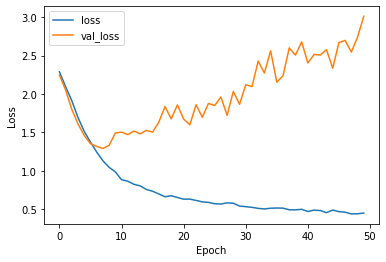

In [ ]:
# Plot the the training loss
plt.plot(results.history["loss"],label="loss")

# Plot the the validation loss

plt.plot(results.history["val_loss"],label="val_loss")
# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")


# Put legend table
plt.legend()

# Show the plot
plt.show()

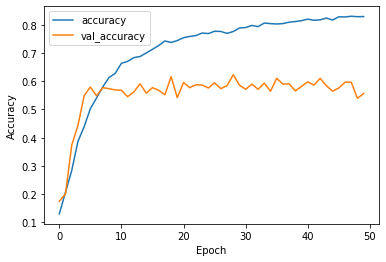

In [ ]:
# Plot the the training loss
plt.plot(results.history["accuracy"],label="accuracy")

# Plot the the validation loss

plt.plot(results.history["val_accuracy"],label="val_accuracy")
# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")


# Put legend table
plt.legend()

# Show the plot
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

28/28 [==============================] - 1s 26ms/step - loss: 3.0421 - accuracy: 0.5596


[3.0421252250671387, 0.5596330165863037]